In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
times = pd.read_csv('./df_times.csv')
jogadores = pd.read_csv('./dfPlayers.csv')

# Descrição Metodológica

Na nossa metodologia, utilizamos o banco de dados fornecido para realizar uma análise aprofundada dos dados. Inicialmente, criamos uma tabela de informações para estabelecer métricas focadas em correlações entre diversos fatos interessantes para a equipe. Por exemplo, examinamos a relação entre o número de chances criadas pelos 20 times da Série A e a porcentagem de êxito nessas finalizações. Nosso objetivo é identificar quais times tiveram maior aproveitamento em relação às chances criadas.

### Times

In [ ]:
times.info()

In [ ]:
times[times['statistics'] == 'bigChances']

In [ ]:
times[times['statistics'] == 'bigChancesMissed']

# Hipotese 1:

### A alguma relação entre grandes chances com grandes chances perdidas ?

In [ ]:
pivoted_times = times.pivot_table(index='time', columns='statistics', values='valor').reset_index()

correlation = pivoted_times['bigChances'].corr(pivoted_times['bigChancesMissed'])

# Criar o gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='bigChances', y='bigChancesMissed', data=pivoted_times)

# Adicionar título e rótulos aos eixos
plt.title('Correlação entre Grandes Chances e Big Chances Missed')
plt.xlabel('Grandes Chances')
plt.ylabel('Grandes Chances Perdidas')

plt.text(min(pivoted_times['bigChances']), max(pivoted_times['bigChancesMissed']) - 2, f'Correlação: {correlation:.2f}', fontsize=12, color='red')


plt.show()


Na analise feita através do grafico mostrado abaixo, podemos ter uma grande compreensao dos dados dos 20 times da serie A do brasileirão 2023.
onde foi realizada uma analise comparativa dentre as grandes chances criadas dentre cada um deles e suas porcentagens de aproveitamento nessas grandes chances criadas e suas correlações.

# Hipotese 2

 ### Existe uma correlação entre gols sofridos e a quantidade de cartão vermelho recebidos.

In [ ]:
pivoted_times = times.pivot_table(index='time', columns='statistics', values='valor').reset_index()

correlation = pivoted_times['goalsConceded'].corr(pivoted_times['redCards'])

plt.figure(figsize=(10, 6))
sns.regplot(x='goalsConceded', y='redCards', data=pivoted_times)

# Adicionar título e rótulos aos eixos
plt.title('Correlação entre Gols Concedidos e Cartãos Vermelhos')
plt.xlabel('Gols Concedidos')
plt.ylabel('Cartões Vermelhos')

plt.text(min(pivoted_times['goalsConceded']), max(pivoted_times['redCards'] - 1) , f'Correlação: {correlation:.2f}', fontsize=12, color='red')


plt.show()

Após a análise dos dados, foi possível identificar uma correlação entre a quantidade de gols sofridos e a quantidade de cartões vermelhos recebidos. Através do gráfico de correlação é possivel observar que a correlação entre as duas variáveis é de 0.54, o que indica uma correlação positiva entre as duas variáveis. Ou seja, quanto maior a quantidade de gols sofridos, maior a quantidade de cartões vermelhos recebidos. Entretanto, é importante ressaltar que a correlação não implica causalidade, ou seja, não podemos afirmar que a quantidade de gols sofridos é a causa da quantidade de cartões vermelhos recebidos. Outros fatores podem influenciar nessa relação, como a qualidade do time, a disciplina dos jogadores, entre outros.

# Hipotese 3

### Jogadores (Não utilizado para hipoteses)

In [25]:
jogadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  29 non-null     object
 1   p1          29 non-null     object
 2   p2          29 non-null     object
 3   p3          29 non-null     object
 4   topPlayers  29 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


In [24]:
jogadores.head()

,Unnamed: 0,p1,p2,p3,topPlayers
0,accurateLongBalls,164 - Rafinha (São Paulo),144 - L. Garcia (Palmeiras),117 - L. Ortiz (Red Bull Bragantino),"[{'statistics': {'accurateLongBalls': 164, 'id..."
1,accuratePasses,2348 - André (Fluminense),1497 - L. Beraldo (São Paulo),1562 - Nino (Fluminense),"[{'statistics': {'accuratePasses': 2348, 'accu..."
2,assists,11 - Hulk (Atlético Mineiro),11 - L. Suárez (Grêmio),8 - Gerson (Flamengo),"[{'statistics': {'assists': 11, 'id': 996553, ..."
3,bigChancesCreated,13 - Hulk (Atlético Mineiro),13 - Eduardo (Botafogo),12 - Raphael Veiga (Palmeiras),"[{'statistics': {'bigChancesCreated': 13, 'id'..."
4,bigChancesMissed,15 - Paulinho (Atlético Mineiro),14 - L. Suárez (Grêmio),13 - Pablo Vegetti (Vasco da Gama),"[{'statistics': {'bigChancesMissed': 15, 'id':..."


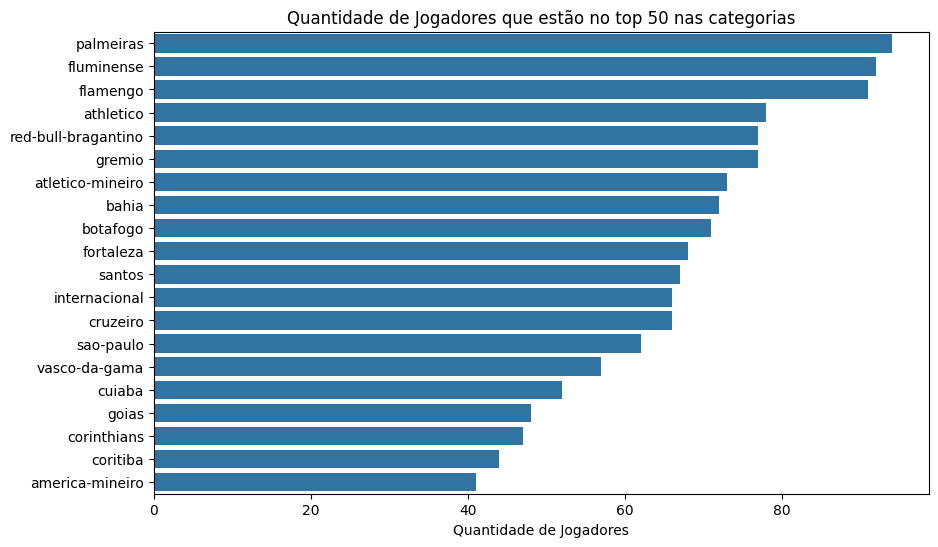

In [57]:
time_qtd: dict[str, int] = {}

for jogadorEstatitiscaGeral in jogadores['topPlayers']:
    jogadorEstatitiscaGeral = eval(jogadorEstatitiscaGeral)
    for jogador in jogadorEstatitiscaGeral:
        team = jogador['team']['slug']
        if team in time_qtd:
            time_qtd[team] += 1
        else:
            time_qtd[team] = 1

# Ordenar o dicionário
time_qtd = dict(
    sorted(time_qtd.items(), key=lambda item: item[1], reverse=True))

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(y=list(time_qtd.keys()), x=list(time_qtd.values()))

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Jogadores que estão no top 50 nas categorias')
plt.xlabel('Quantidade de Jogadores')

plt.show()

In [68]:
time_qtd: dict[str, int] = {}

for jogadorEstatitiscaGeral in jogadores['topPlayers']:
    jogadorEstatitiscaGeral = eval(jogadorEstatitiscaGeral)
    for jogador in jogadorEstatitiscaGeral:
        team = jogador['team']['slug']
        if team in time_qtd:
            time_qtd[team] += 1
        else:
            time_qtd[team] = 1

# Ordenar o dicionário
time_qtd = dict(
    sorted(time_qtd.items(), key=lambda item: item[1], reverse=True))[:5]

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(y=list(time_qtd.keys()), x=list(time_qtd.values()))

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Jogadores que estão no top 50 nas categorias')
plt.xlabel('Quantidade de Jogadores')

plt.show()

KeyError: slice(None, 5, None)

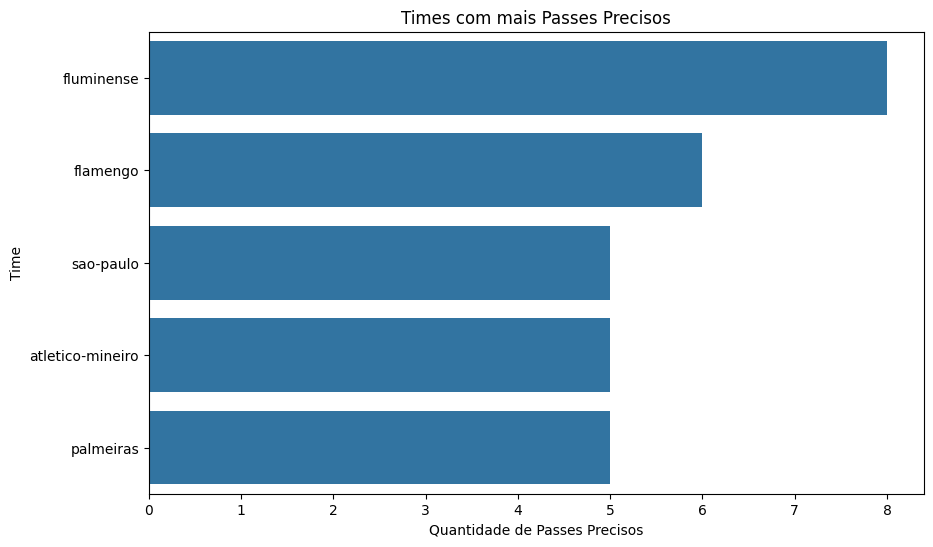

In [64]:
time_qtd_accuratePasses = {}

for jogadorEstatitiscaGeral in jogadores['topPlayers']:
    jogadorEstatitiscaGeral = eval(jogadorEstatitiscaGeral)
    for jogador in jogadorEstatitiscaGeral:
        team = jogador['team']['slug']
        if 'accuratePasses' in jogador['statistics']:
            time_qtd_accuratePasses[team] = time_qtd_accuratePasses.get(team, 0) + 1

# Ordenar o dicionário
time_qtd_accuratePasses = dict(
    sorted(
        time_qtd_accuratePasses.items(), 
        key=lambda item: item[1], 
        reverse=True
    )[:5]
)

# Criar dois graficos de barras

plt.figure(figsize=(10, 6))
sns.barplot(y=list(time_qtd_accuratePasses.keys()), x=list(time_qtd_accuratePasses.values()))

time_accuratePasses = times[times['statistics'] == 'accuratePasses'][:5]
time_accuratePasses = time_accuratePasses[['time', 'valor']].sort_values(by='valor', ascending=False)

sns.barplot(y='time', x='valor', data=time_accuratePasses, ax=axs[1])

plt.title('Times com mais Passes Precisos')
plt.xlabel('Quantidade de Passes Precisos')
plt.ylabel('Time')

plt.show()